In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
tips = sns.load_dataset("tips")
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


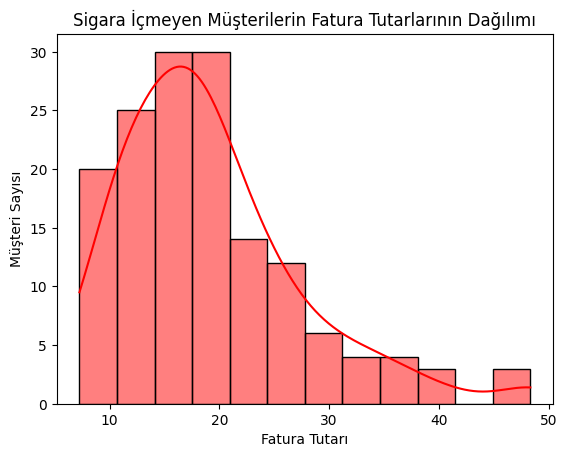

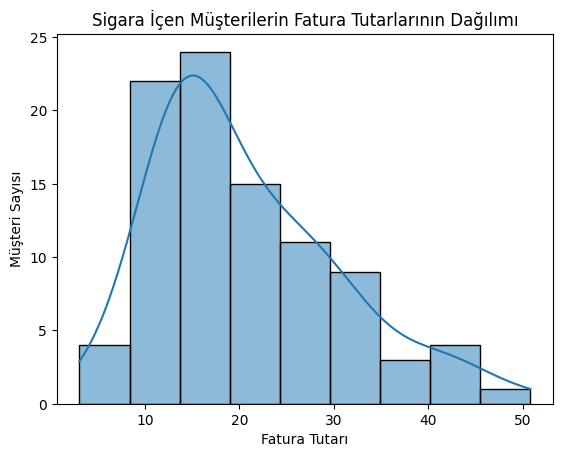

In [4]:
# Soru: Sigara içen ve içmeyen müşterilerin fatura tutarlarının dağılımını gösteren bir histogram oluşturun.
sns.histplot(data=tips.loc[tips['smoker']=='No'], x="total_bill", color = 'red',kde = True)
plt.title('Sigara İçmeyen Müşterilerin Fatura Tutarlarının Dağılımı')
plt.xlabel('Fatura Tutarı')
plt.ylabel('Müşteri Sayısı')
plt.show()

# Sigara içen müşterilerin fatura tutarlarının dağılımını gösteren bir histogram
sns.histplot(data=tips.loc[tips['smoker']=='Yes'], x="total_bill", kde= True)
plt.title('Sigara İçen Müşterilerin Fatura Tutarlarının Dağılımı')
plt.xlabel('Fatura Tutarı')
plt.ylabel('Müşteri Sayısı')
plt.show()

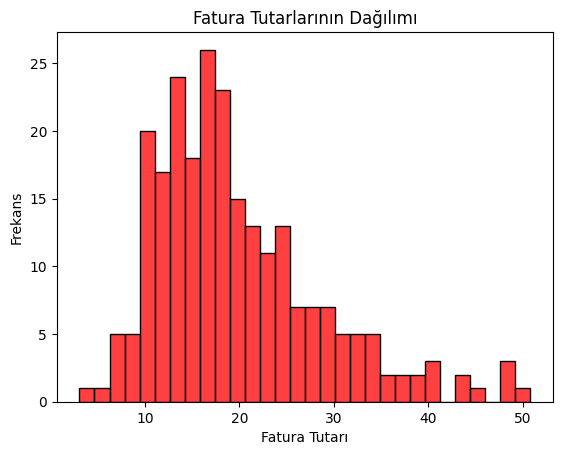

In [5]:
# Soru: Veri setindeki "total_bill" değişkeninin dağılımını gösteren bir histogram oluşturun.
g = sns.histplot(data=tips, x="total_bill", bins=30, color="red")

g.set_title("Fatura Tutarlarının Dağılımı")
g.set_xlabel("Fatura Tutarı")
g.set_ylabel("Frekans")

plt.show()

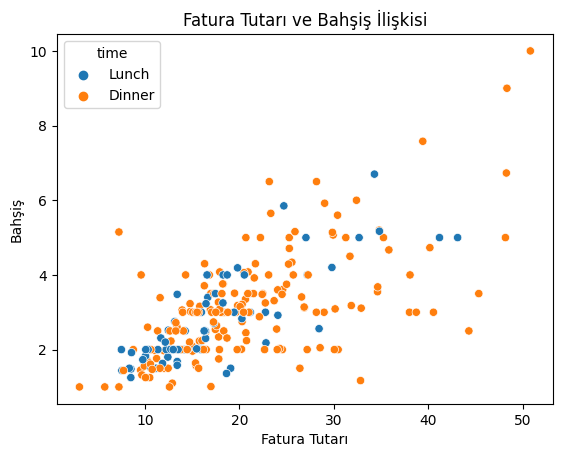

In [6]:
# Soru: Veri setindeki "total_bill" ve "tip" değişkenleri arasındaki ilişkiyi gösteren bir 
# scatterplot oluşturun. Ayrıca, "time" değişkenini kullanarak noktaları renklendirin.
g = sns.scatterplot(data=tips, x="total_bill", y="tip", hue="time")

g.set_title("Fatura Tutarı ve Bahşiş İlişkisi")
g.set_xlabel("Fatura Tutarı")
g.set_ylabel("Bahşiş")

plt.show()

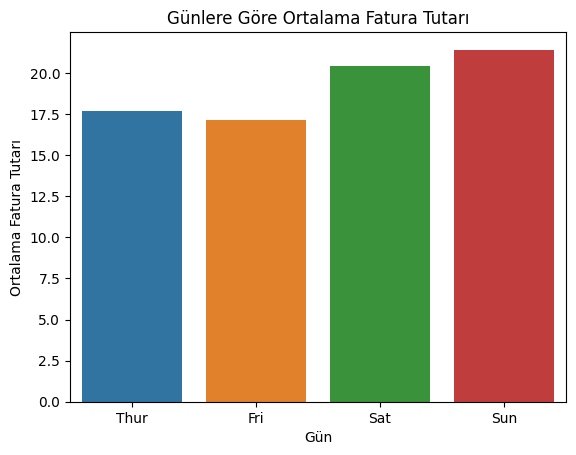

In [7]:
# Soru: Veri setindeki "day" ve "total_bill" değişkenlerini kullanarak, 
# her gün için ortalama toplam fatura tutarını gösteren bir barplot oluşturun.
g = sns.barplot(data=tips, x="day", y="total_bill", errorbar=None)

g.set_title("Günlere Göre Ortalama Fatura Tutarı")
g.set_xlabel("Gün")
g.set_ylabel("Ortalama Fatura Tutarı")

plt.show()

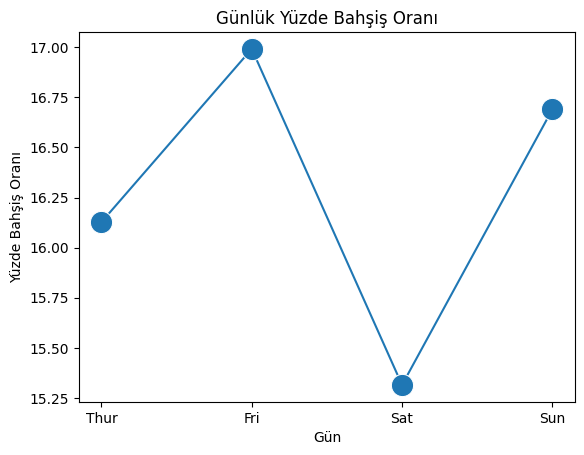

In [8]:
# Soru: "tips" veri setinde, her günün bahşiş oranını (yüzde olarak) hesaplayın 
# ve bunları gösteren bir line plot oluşturun.

tips["tip_percent"] = (tips["tip"] / tips["total_bill"]) * 100

tip_percent_daily = tips.groupby("day")["tip_percent"].mean().reset_index()

sns.lineplot(data=tip_percent_daily, x="day", y="tip_percent", marker="o", markersize=16)
plt.title('Günlük Yüzde Bahşiş Oranı')
plt.xlabel('Gün')
plt.ylabel('Yüzde Bahşiş Oranı')
plt.show()

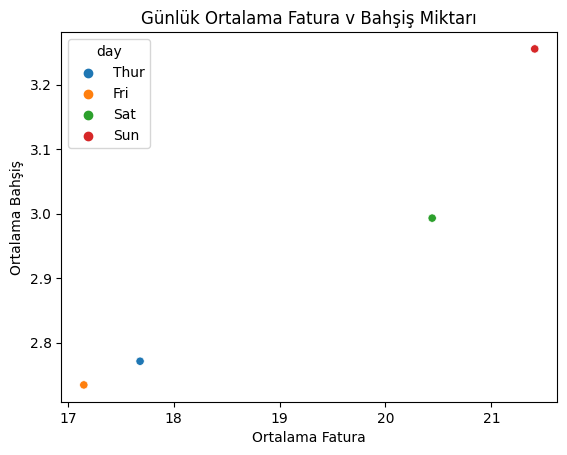

In [10]:
# Soru: "tips" veri setinde, her gün için fatura tutarının ve bahşiş miktarının ortalamasını hesaplayarak, 
# iki değişken arasındaki ilişkiyi gösteren bir scatterplot oluşturun.

avg_bill_tip = tips.groupby("day").agg({"total_bill": "mean", "tip": "mean"}).reset_index()

sns.scatterplot(data=avg_bill_tip, x="total_bill", y="tip", hue="day")

plt.title("Günlük Ortalama Fatura v Bahşiş Miktarı")
plt.xlabel("Ortalama Fatura")
plt.ylabel("Ortalama Bahşiş")
plt.show()

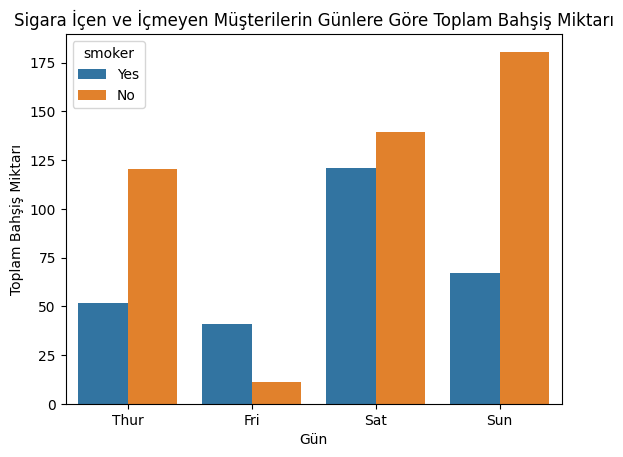

In [11]:
# Soru: Sigara içen ve içmeyen müşterilerin, farklı günlerde ödedikleri toplam
# bahşiş miktarını gösteren bir bar plot oluşturun.
ttips_by_day_smoker = tips.groupby(["smoker", "day"])["tip"].sum().reset_index()

sns.barplot(data=ttips_by_day_smoker, x="day", y="tip", hue="smoker")
plt.title("Sigara İçen ve İçmeyen Müşterilerin Günlere Göre Toplam Bahşiş Miktarı")
plt.xlabel("Gün")
plt.ylabel("Toplam Bahşiş Miktarı")
plt.show()

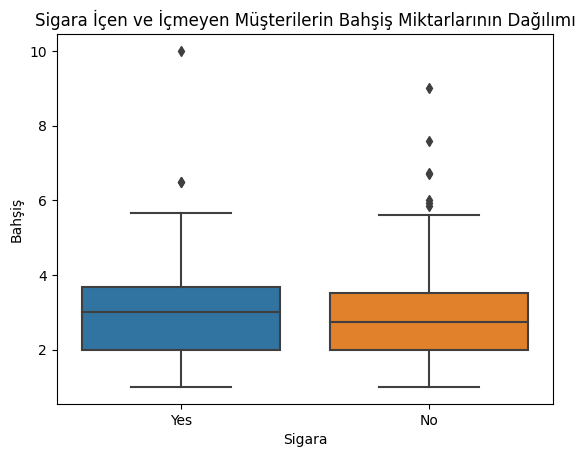

In [13]:
# Soru: Sigara içen ve içmeyen müşterilerin ödedikleri bahşiş miktarlarının
# dağılımını gösteren bir boxplot oluşturun.

sns.boxplot(data=tips, x="smoker", y="tip")
plt.title("Sigara İçen ve İçmeyen Müşterilerin Bahşiş Miktarlarının Dağılımı")
plt.xlabel("Sigara")
plt.ylabel("Bahşiş")
plt.show()

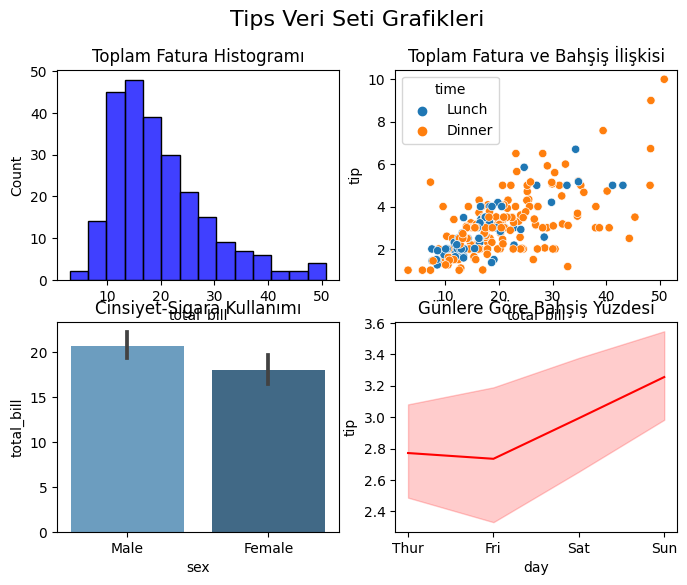

In [18]:
# Soru: Yukarıdan seçeceğiniz 4 farklı plotu, subplot kullanarak çizdirin.

fig, axs = plt.subplots(2, 2, figsize=(8, 6))

# İlk subplot: total_bill histogramı
sns.histplot(data=tips, x="total_bill", ax=axs[0, 0], color='blue')
axs[0, 0].set_title('Toplam Fatura Histogramı')

# İkinci subplot: total_bill / tip scatterplot
sns.scatterplot(data=tips, x="total_bill", y="tip", ax=axs[0, 1], hue="time")
axs[0, 1].set_title('Toplam Fatura ve Bahşiş İlişkisi')

# Üçüncü subplot: günler için ortalama total_bill barplot
sns.barplot(data=tips, x="sex", y="total_bill", ax=axs[1, 0], palette="Blues_d")
axs[1, 0].set_title('Cinsiyet-Sigara Kullanımı')

# Dördüncü subplot: günler vs. yemek vakti lineplot
sns.lineplot(data=tips, x="day", y="tip", ax=axs[1, 1], markers=True, color='red')
axs[1, 1].set_title('Günlere Göre Bahşiş Yüzdesi')

# Alt başlığı ayarla
plt.suptitle('Tips Veri Seti Grafikleri', fontsize=16)

# Grafikleri göster
plt.show()